In [1]:
import tensorflow as tf
import os
import cv2
import imghdr

In [6]:
data_dir = 'dataset'

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image dataset/class2/Lumpy_Skin_115.png
Issue with image dataset/class2/Lumpy_Skin_101.png
Issue with image dataset/class2/Lumpy_Skin_129.png
Issue with image dataset/class2/Lumpy_Skin_317.png
Issue with image dataset/class2/Lumpy_Skin_303.png
Issue with image dataset/class2/Lumpy_Skin_288.png
Issue with image dataset/class2/Lumpy_Skin_263.png
Issue with image dataset/class2/Lumpy_Skin_277.png
Issue with image dataset/class2/Lumpy_Skin_67.png
Issue with image dataset/class2/Lumpy_Skin_73.png
Issue with image dataset/class2/Lumpy_Skin_98.png
Issue with image dataset/class2/Lumpy_Skin_99.png
Issue with image dataset/class2/Lumpy_Skin_72.png
Issue with image dataset/class2/Lumpy_Skin_66.png
Issue with image dataset/class2/Lumpy_Skin_276.png
Issue with image dataset/class2/Lumpy_Skin_262.png
Issue with image dataset/class2/Lumpy_Skin_289.png
Issue with image dataset/class2/Lumpy_Skin_302.png
Issue with image dataset/class2/Lumpy_Skin_316.png
Issue with image dataset/class2/Lumpy

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [12]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=32,
    image_size=(256,256),
    shuffle=True,
    seed=42
                                                           )

Found 682 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

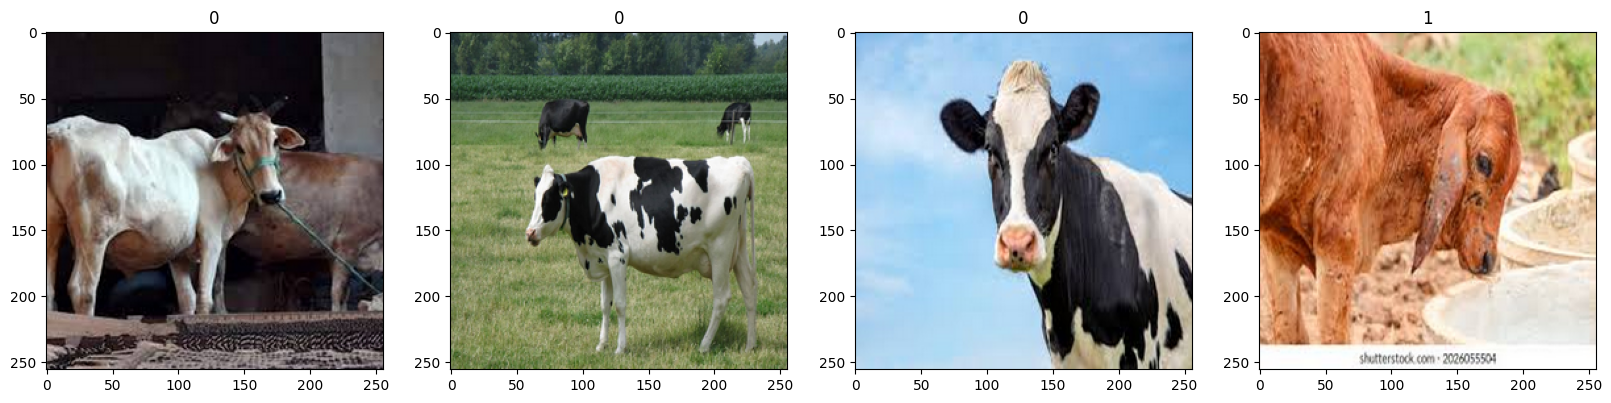

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.1882353 , 0.18431373, 0.13333334],
          [0.18431373, 0.1764706 , 0.13333334],
          [0.1882353 , 0.1764706 , 0.14117648],
          ...,
          [0.15294118, 0.16078432, 0.07450981],
          [0.18039216, 0.1882353 , 0.10196079],
          [0.23529412, 0.24313726, 0.15686275]],
 
         [[0.17254902, 0.16470589, 0.11764706],
          [0.18039216, 0.17254902, 0.12941177],
          [0.19607843, 0.18039216, 0.14901961],
          ...,
          [0.13725491, 0.14509805, 0.05882353],
          [0.14901961, 0.15686275, 0.07058824],
          [0.23529412, 0.24313726, 0.15686275]],
 
         [[0.14901961, 0.14117648, 0.09411765],
          [0.1764706 , 0.16862746, 0.1254902 ],
          [0.20784314, 0.19607843, 0.15686275],
          ...,
          [0.14117648, 0.14509805, 0.0627451 ],
          [0.1254902 , 0.13333334, 0.04705882],
          [0.22745098, 0.23529412, 0.14901961]],
 
         ...,
 
         [[0.6784314 , 0.54509807, 0.40784314],
          [0.66666

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - accuracy: 0.5488 - loss: 0.7440 - val_accuracy: 0.6562 - val_loss: 0.6587
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - accuracy: 0.6127 - loss: 0.6412 - val_accuracy: 0.7656 - val_loss: 0.5207
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 221ms/step - accuracy: 0.7592 - loss: 0.4703 - val_accuracy: 0.7969 - val_loss: 0.4512
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - accuracy: 0.8324 - loss: 0.4331 - val_accuracy: 0.8828 - val_loss: 0.3754
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 230ms/step - accuracy: 0.8423 - loss: 0.3693 - val_accuracy: 0.8828 - val_loss: 0.2993
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - accuracy: 0.8821 - loss: 0.2818 - val_accuracy: 0.9375 - val_loss: 0.2316
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 231ms/step - accuracy: 0.9257 - loss: 0.2412 - val_accuracy: 0.9531 - val_loss: 0.2254
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 236ms/step - accuracy: 0.9255 - loss: 0.1846 - val_accuracy: 0.

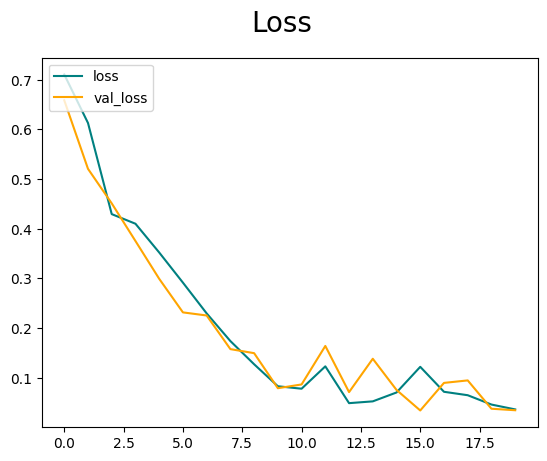

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

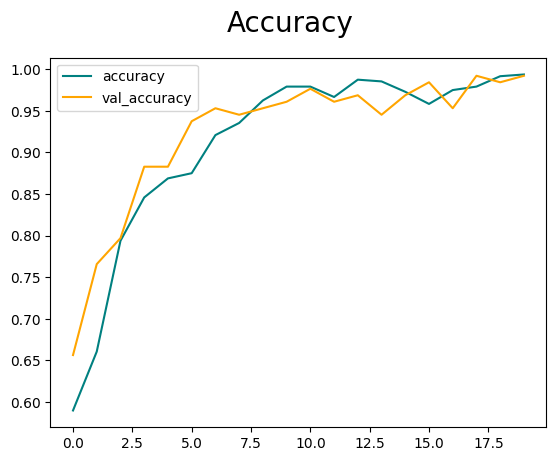

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


2025-07-28 22:20:40.974360: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9677419, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.984375, shape=(), dtype=float32)


In [33]:
from tensorflow.keras.models import load_model

In [34]:
model.save(os.path.join('models','imageclassifier.h5'))

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# Initialize lists to store true labels and predictions
y_true = []
y_pred = []

# Iterate through the test dataset
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    # Convert probabilities to binary predictions (threshold = 0.5 for binary classification)
    yhat_binary = (yhat > 0.5).astype(int)
    y_true.extend(y)
    y_pred.extend(yhat_binary.flatten())

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


2025-07-28 22:21:11.097821: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# Calculate F1 score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9863


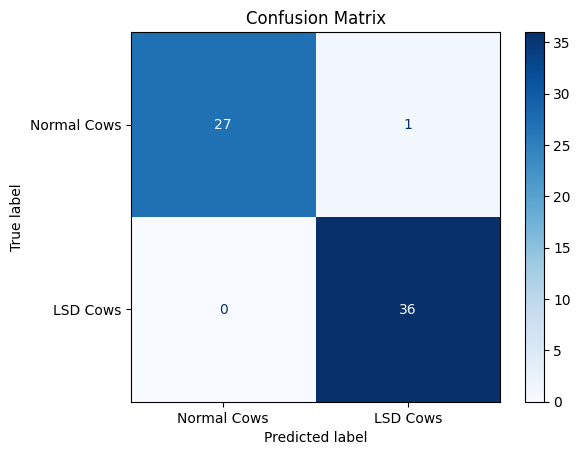

In [39]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal Cows', 'LSD Cows'])  # Adjust labels as needed
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()